In [1]:
"""
_1_classical_mechanics.py

Installation:
=============
sudo pip3 install wolframclient
sudo pip3 install nbextensions

Functions:
========== 
sympy.calculus.euler.euler_equations

References:
===========    
    Books:
    ======    
    Gerd Baumann, Mathematica for Theoretical Physics I, Classical Mechanics and Nonlinear Dynamics, (Springer, 2nd Ed., 2005)(ISBN 0387016740)
    Armin Wachter, Henning Hoeber, Compendium of Theoretical Physics, Springer, 2006 (ISBN-10: 0-387-25799-3).
    Douglas Cline, Variational Principles In Classical Mechanics, https://LibreTexts.org
    Christopher W. Kulp, Vasilis Pagonis, Classical Mechanics A Computational Approach with Examples Using Mathematica and Python
    Gerald Jay Sussman, Jack Wisdom - Structure and Interpretation of Classical Mechanics, MIT Press (2014)
    
    Python Books:
    =============    
    Python Programming And Numerical Methods: A Guide For Engineers And Scientists
        https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html
    R. Johansson, Numerical Python A Practical Techniques Approach for Industry, Berkeley, CA, APress, 2015.
        https://jrjohansson.github.io/numericalpython.html
        https://github.com/jrjohansson
    
    Problem Books:
    ==============    
    Vladimir Pletser - Lagrangian and Hamiltonian Analytical Mechanics Forty Exercises Resolved and Explained-Springer Singapore (2018)

Homeworks
=========
    2341:"motion_on_a_helix"
    2342:"motion_of_a_projectile"
    
    p129- U ?, Eng, 
    p130 2483 The Phase Diagram
    
    p156, 157 apply Laplace transform to driven oscillator ODE and obtain p157.

"""
import copy
import sys
import os
lstPaths = ["../src"]
for ipath in lstPaths:
    if ipath not in sys.path:
        sys.path.append(ipath)
import scipy as sp        
from libsympy import *
from mechanics import *
from sympy.physics import mechanics
mechanics.mechanics_printing()
# Mathematica Client
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr

libsympy is loaded.


In [ ]:
!pip install sage # todo kaldik
print(sys.version)
print(sys.path)

### Settings

In [2]:
### Settings
#----Settings
class sets:
    """
    Setttings class.
        
    Instead of settings class, settings nametuble might be used.
    Settings = namedtuple("Settings", "type dropinf delta")
    sets = Settings(type="symbolic", dropinf=True, delta=0.1)
    """
    global dictflow, test_all
    
    def __init__(self):
        pass
    
    # File settings
    input_dir  = "input/mechanics"
    output_dir = "output/mechanics"
    
    # Plotting settings
    plot_time_scale = {1:"xy", 2:"xz", 3:"yz"}[3]

    # Execution settings.
    test_all = {0:False, 1:True}[1]
    dictflow = {100:"get_formulary", 150:"get_subformulary",
               200:"simple_harmonic_oscillator_scalar", 201:"simple_harmonic_oscillator_vectorial", 
               2321:"Coordinate_Systems", 2322:"Moving_Particle",
               2341:"motion_on_a_helix", 2342:"motion_of_a_projectile",
               
               2484:"Damped_Harmonic_Oscillator",
               2485:"Driven_Oscillations",
               24861:"Driven_Oscillations_The_Laplace_Transform_Method",
               24862:"Driven_Oscillations_Greens_Function_Method",
               
               263:"Eulers_Equation", 2651:"Brachystochrone_Baumann",
               2652:"Brachystochrone_Wachter", 266:"Euler_Operator",
               267:"2.6.7 Euler Operator for q + p Dimensions",
               272:"2.7.2 Hamiltons Principle Historical Remarks",
               2731:"2.7.3.1 Example 1: Harmonic Oscillator",
               2732:"2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane",
               2733:"2.7.3.3 Example 2: Sliding Mass Connected to a Pendulum",
               2820:"2.8.2.0 Motion in a uniform gravitational field",
               2821:"2.8.2.1 Example 1: Moving Beat on a String",
               2841:"2.8.4.1 Example 1: Motion on a Cylinder"}
    flow = [dictflow[i] for i in [2841]]
    if test_all: flow = [dictflow[i] for i in dictflow.keys()]
print(sets.flow)

['get_formulary', 'get_subformulary', 'simple_harmonic_oscillator_scalar', 'simple_harmonic_oscillator_vectorial', 'Coordinate_Systems', 'Moving_Particle', 'motion_on_a_helix', 'motion_of_a_projectile', 'Damped_Harmonic_Oscillator', 'Driven_Oscillations', 'Driven_Oscillations_The_Laplace_Transform_Method', 'Driven_Oscillations_Greens_Function_Method', 'Eulers_Equation', 'Brachystochrone_Baumann', 'Brachystochrone_Wachter', 'Euler_Operator', '2.6.7 Euler Operator for q + p Dimensions', '2.7.2 Hamiltons Principle Historical Remarks', '2.7.3.1 Example 1: Harmonic Oscillator', '2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane', '2.7.3.3 Example 2: Sliding Mass Connected to a Pendulum', '2.8.2.0 Motion in a uniform gravitational field', '2.8.2.1 Example 1: Moving Beat on a String', '2.8.4.1 Example 1: Motion on a Cylinder']


In [ ]:
### Formulary
print("Test of the {0}.".format(sets.flow))
if "get_formulary" in sets.flow:
    omech.__init__("scalar")
    omech.get_formulary()
    omech.get_formulary(style="eq")
    
    omech.__init__("vectorial")
    omech.get_formulary()    

    omech.__init__("EulerLagrange")
    omech.get_formulary()

In [ ]:
if "get_subformulary" in sets.flow:
    omech.__init__()
    omech.get_subformulary()

## 2.4 Newtonian Mechanics

---- 2.4 Newtonian Mechanics

### simple_harmonic_oscillator_scalar

2.4.8.2 Harmonic Oscillator, p126.


'solve NewtonsLaw2 Derivative(x(t), (t, 2))'

solve(Eq(F, m*Derivative(x(t), (t, 2))), Derivative(x(t), (t, 2)))


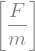

"Newton's 2nd Law"

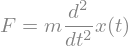

"Hooke's Law"

'Eq NewtonsLaw2 HookesLaw'

Equality(m*Derivative(x(t), (t, 2)), -k*x(t))


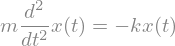

'Eq NewtonsLaw2 HookesLaw'

Equality(m*Derivative(x(t), (t, 2)), -k*x(t))


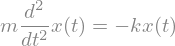

'subs omech.result [(k/m, w**2)]'

Eq(Derivative(x(t), (t, 2)), -k*x(t)/m)(subs, [(k/m, w**2)])


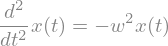

'dsolve omech.result x(t)'

dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))


Codes:
 Equality(m*Derivative(x(t), (t, 2)), -k*x(t))
 Equality(m*Derivative(x(t), (t, 2)), -k*x(t))
 Eq(Derivative(x(t), (t, 2)), -k*x(t)/m)(subs, [(k/m, w**2)])
 dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))



'dsolve omech.result x(t)'

dsolve(Eq(x(t), C1*sin(t*w) + C2*cos(t*w)), x(t))


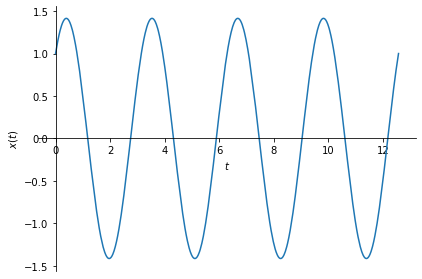

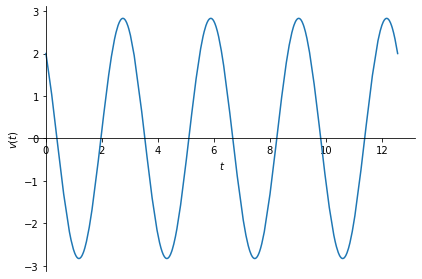

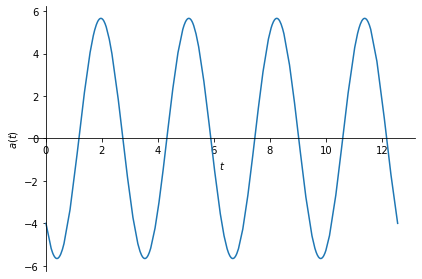

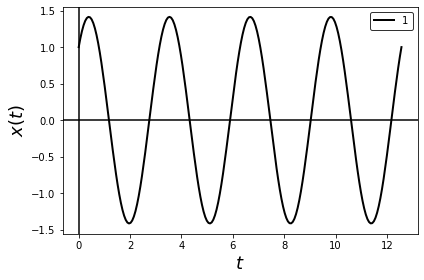

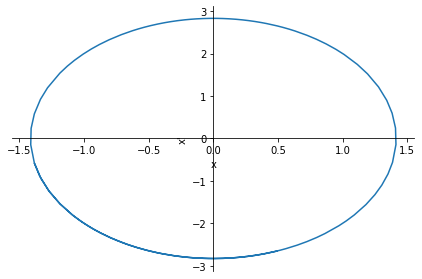

In [5]:
#----> simple_harmonic_oscillator_scalar
if "simple_harmonic_oscillator_scalar" in sets.flow: # simple_harmonic_oscillator_scalar
    """       
    Example: Solve a from F = ma
    """
#    omech = mechanics() # DO NOT create any instance.
    print("2.4.8.2 Harmonic Oscillator, p126.")
    omech.__init__("scalar")
    omech.verbose = True
    commands = ["solve", "NewtonsLaw2", omech.a.rhs]
    omech.process(commands)

    """
    Example: Solve position of a spring mass system.
    F = ma, F = -kx
    -kx = ma
    -kx = m d^2 x/dt^2
    w = sqrt(k/m)
    x(t) = C1*sin(wt) + C2*sin(wt)
    """
    # Scalar Way.
    omech.__init__("scalar")
    omech.verbose = True
    display("Newton's 2nd Law", omech.NewtonsLaw2, 
            "Hooke's Law", omech.HookesLaw)
    
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
    omech.process(commands)
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    omech.result = Eq(simplify(res.lhs/m), simplify(res.rhs/m)) 
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
#    omech.result = Eq(omech.result.lhs.coeff(C.i), omech.result.rhs)
    commands = ["dsolve", "omech.result", omech.x]
    omech.process(commands)
    print("Codes:\n", *omech.get_codes())
       
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    T = omech.T.evalf(subs={x:omech.x}).doit()
    U = omech.U.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a,T,U)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs
    a = a.evalf(subs=numvals).rhs
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")

    #--- 2.4.8.3 The Phase Diagram
    x = omech.result.rhs.evalf(subs=numvals).doit()
    plot_parametric((x,v),(t,1,5), xlabel="x", ylabel="x'")

### simple_harmonic_oscillator_vectorial   

'Eq NewtonsLaw2 HookesLaw'

Equality((m*Derivative(x(t), (t, 2)))*C.i + (m*Derivative(y(t), (t, 2)))*C.j + (m*Derivative(z(t), (t, 2)))*C.k, -k*x(t))


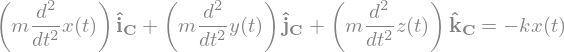

'subs omech.result [(k/m, w**2)]'

Eq((Derivative(x(t), (t, 2)))*C.i + (Derivative(y(t), (t, 2)))*C.j + (Derivative(z(t), (t, 2)))*C.k, -k*x(t)/m)(subs, [(k/m, w**2)])


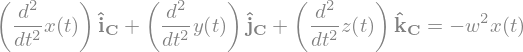

'dsolve omech.result x(t)'

dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))


Codes:
 Equality((m*Derivative(x(t), (t, 2)))*C.i + (m*Derivative(y(t), (t, 2)))*C.j + (m*Derivative(z(t), (t, 2)))*C.k, -k*x(t))
 Eq((Derivative(x(t), (t, 2)))*C.i + (Derivative(y(t), (t, 2)))*C.j + (Derivative(z(t), (t, 2)))*C.k, -k*x(t)/m)(subs, [(k/m, w**2)])
 dsolve(Eq(Derivative(x(t), (t, 2)), -w**2*x(t)), x(t))



'dsolve omech.result x(t)'

dsolve(Eq(x(t), C1*sin(t*w) + C2*cos(t*w)), x(t))


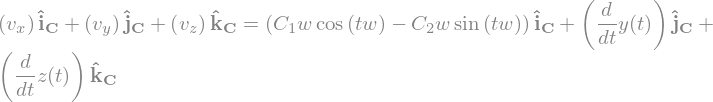

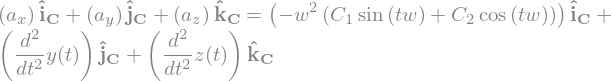

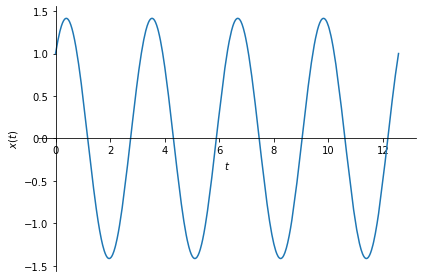

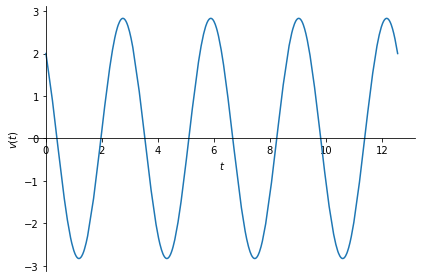

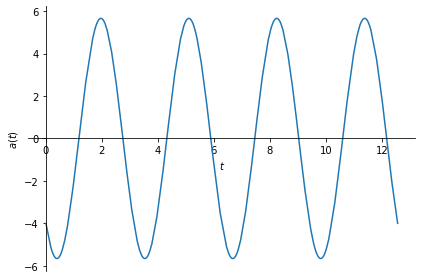

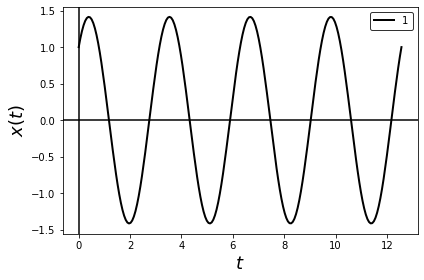

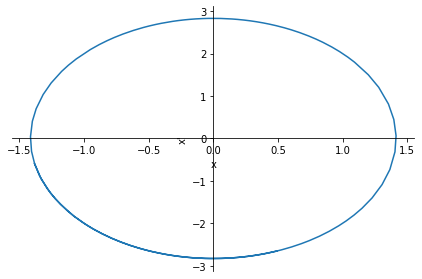

In [5]:
#----> simple_harmonic_oscillator_vectorial    
if "simple_harmonic_oscillator_vectorial" in sets.flow:   
    # Vectorial Way.
    # omech.class_type = "vectorial"
    omech.__init__("vectorial")
    omech.verbose = True
    
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    omech.result = Eq(simplify(res.lhs/m), simplify(res.rhs/m)) 
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
    omech.result = Eq(omech.result.lhs.coeff(C.i), omech.result.rhs)
    commands = ["dsolve", "omech.result", omech.x]
    omech.process(commands)
    print("Codes:\n", *omech.get_codes())
    
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs.components[C.i]
    # a = a.evalf(subs=numvals).rhs.components[C.i]
    a = a.xreplace(numvals).rhs.components[C.i]
    
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")
    
    # The Phase Diagram
    x = omech.result.rhs.evalf(subs=numvals).doit()
    plot_parametric((x,v),(t,1,5), xlabel="x", ylabel="x'")

## Coordinate_Systems

Example 1. Coordinate Systems, p78.
Polar Coordinates


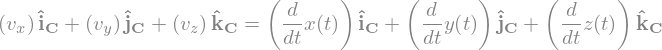

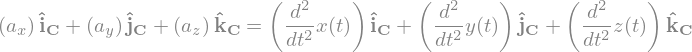

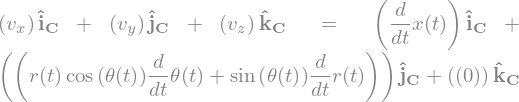

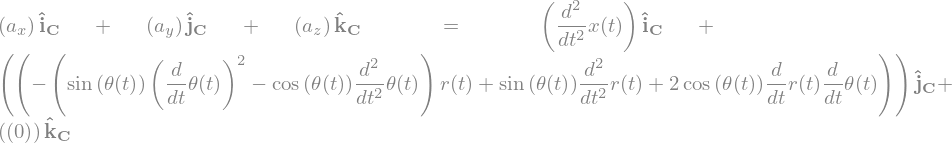

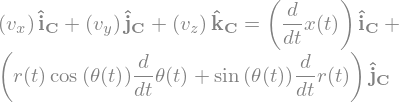

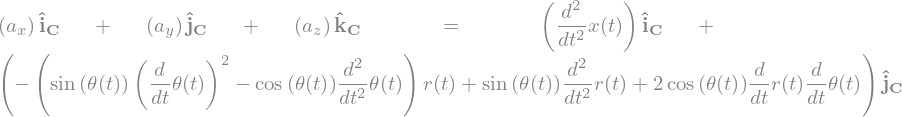

Components of r


Components of v


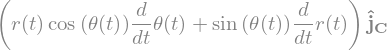

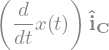

Components of a


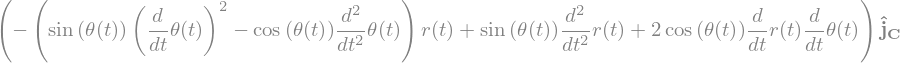

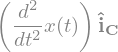

In [6]:
#----> Coordinate_Systems
if "Coordinate_Systems" in sets.flow:
    print("Example 1. Coordinate Systems, p78.")
    print("Polar Coordinates")
    omech.__init__("vectorial")
    omech.verbose = False

    xreplaces = {x:r*cos(theta)*C.i,
                 y:r*sin(theta)*C.j,
                 z:0}
    xreplaces = {x:omech.subformulary.pol_to_cart_x,
                 y:omech.subformulary.pol_to_cart_y,
                 z:0} # C.k
    display(omech.r, omech.v, omech.a)
    display(xreplaces)

    commands = ["xreplace", "omech.r", xreplaces]
    r = omech.process(commands).doit()
    commands = ["xreplace", "omech.v", xreplaces]
    v = omech.process(commands).doit()
    commands = ["xreplace", "omech.a", xreplaces]
    a = omech.process(commands).doit()
    display(x,y,z,r,v,a)
    
    print("Components of r")
    [display(r.rhs.args[i]) for i in range(2)]
    print("Components of v")
    [display(v.rhs.args[i]) for i in range(2)]
    print("Components of a")
    [display(a.rhs.args[i]) for i in range(2)]

## Moving_Particle

Example 2. Moving Particle, p80.
Spherical Coordinates


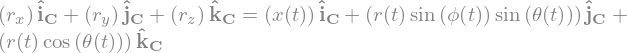

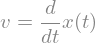

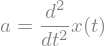

'x='

'y='

'z='

'r='

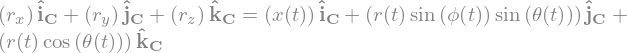

'v='

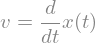

'a='

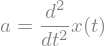

In [7]:
#----> Moving_Particle
if "Moving_Particle" in sets.flow:
    print("Example 2. Moving Particle, p80.")
    print("Spherical Coordinates")
    omech.class_type = "vectorial"
    omech.__init__()
    omech.verbose = False
    xreplaces = {x:omech.subformulary.sph_to_cart_x,
                 y:omech.subformulary.sph_to_cart_y,
                 z:omech.subformulary.sph_to_cart_z}
    x = omech.x.evalf(subs=xreplaces).doit()
    y = omech.y.evalf(subs=xreplaces).doit()
    z = omech.z.evalf(subs=xreplaces).doit()
    commands = ["xreplace", "omech.r", xreplaces]
    r = omech.process(commands).doit()
    commands = ["xreplace", "omech.v", xreplaces]
    v = omech.process(commands).doit()
    commands = ["xreplace", "omech.a", xreplaces]
    a = omech.process(commands).doit()
#    a = simplify( omech.a.rhs.evalf(subs=xreplaces).doit()) # Does not work.
    pprints("x=", x,
            "y=", y,
            "z=", z,
            "r=", r,
            "v=", v,
            "a=", a)

## 2.4.8.4 Damped_Harmonic_Oscillator

'2.4.8.4 Damped Harmonic Oscillator, p133.'

'General Solution'

'Overdamped Motion'

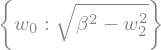

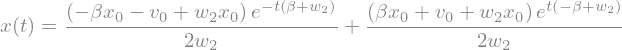

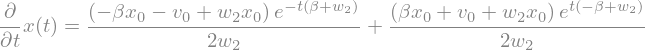

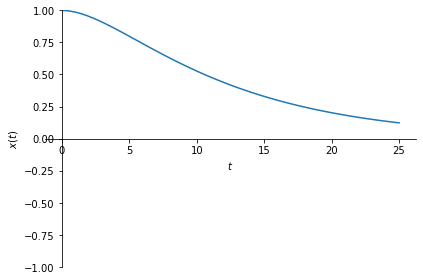

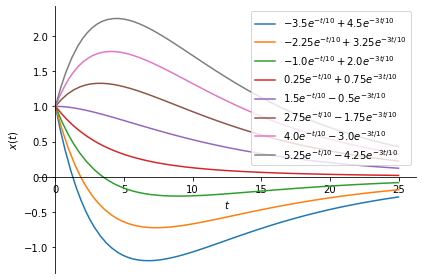

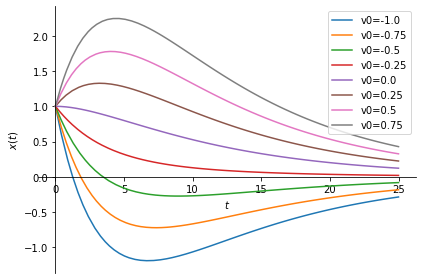

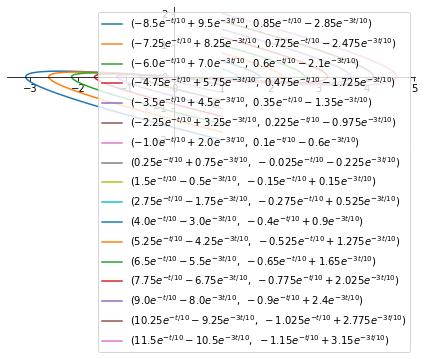

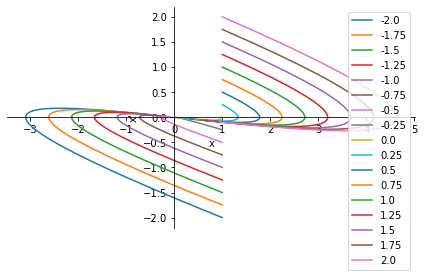

In [8]:
#----> Damped_Harmonic_Oscillator
if "Damped_Harmonic_Oscillator" in sets.flow:
    pprints("2.4.8.4 Damped Harmonic Oscillator, p133.",
            "General Solution")
    
    # General Solution.
    case = {1:"underdamped", 2:"critical_damped", 3:"overdamped"}[3]

    if case == "underdamped":   
        omech.__init__("scalar")
        omech.verbose = True
        pprints("Underdamped Motion, p134.",
                omech.subformulary.underdamping_criteria)
        commands = ["dsolve", "damped_harmonic_oscillator1", omech.x]
        omech.process(commands)
        commands = ["dsolve", "damped_harmonic_oscillator2", omech.x]
        omech.x = omech.process(commands).rhs
        v = omech.v.evalf(subs={x:omech.x}).doit()
        T = omech.T.evalf(subs={x:omech.x}).doit()
        _U = Function('U')(t)          # Potential energy.
        _H = Function('H')(t)          # Total energy.
        U = Eq(_U, S(1)/2*k*(omech.x)**2)
        H = Eq(_H, T.rhs + U.rhs)
        display(v,T,U,H)
        
        # Numerical calculations.
        [C1,C2] = symbols('C1 C2')
        numvals = {C1:1, C2:1, beta:S(1)/7, w0:sqrt(1+(S(1)/7)**2), k:1, m:1} # Exact solution's numerical values.
        envvals = {C1:1, C2:1, beta:S(1)/7, w0:S(1)/7} # Envelope function's numerical values. w1->0.
        
    #    commands = ["xreplace", "omech.x", numvals]
    #    omech.process(commands)
        x = omech.x.evalf(subs=numvals)
        x_env = omech.x.evalf(subs=envvals)
        v = v.evalf(subs=numvals).rhs
        H = H.evalf(subs=numvals).rhs
        # Plot x(t) and envelope functions.
        plot(x, x_env, -x_env, (t,0,5*pi,200), xlabel="$t$", ylabel="$x(t)$")
        # Plot H and dH/dt.
        p = plot(H, diff(H,t), (t,0,5*pi,200), xlabel="$t$", ylabel="$H$, $dH/dt$",
                   legend=True)
        p[0].label = 'H'
        p[1].label = 'dH/dt'
        p.show()
        # Plot phase diagram, x' versus x.
        plot_parametric((x,v), (t,0,25), xlabel="x", ylabel="x'")
    
    if case == "critical_damped":
        """
        Critical Damped Motion
        dsolve(omech.damped_harmonic_oscillator2.subs({w0:beta}), omech.x, ics={omech.x.subs({t:0}):x0, diff(omech.x, t).subs({t:0}):v0})
        """
        omech.class_type = "scalar"
        omech.__init__()
        omech.verbose = True
        pprints("Critical Damped Motion",
               omech.subformulary.critical_damping_criteria)
        omech.x = dsolve(omech.damped_harmonic_oscillator2.subs(omech.subformulary.critical_damping_criteria), 
                         omech.x, 
                         ics={omech.x.subs({t:0}):x0, 
                              diff(omech.x, t).subs({t:0}):v0}) 
        display(omech.x)
        
        # Numerical calculations.
        numvals = {beta:S(1)/5, x0:1, v0:0}
        x_t = omech.x.evalf(subs=numvals).rhs
        # Plot x(t).
        plot(x_t, (t,0,25,200), xlabel="$t$", ylabel="$x(t)$")
        
    if case == "overdamped":
        """
        Overdamped Motion
        
        f = lambda i:x.rhs.subs(v0,i)
        list(map(f,[1,2]))
        """
        omech.class_type = "scalar"
        omech.__init__()
        omech.verbose = True
        pprints("Overdamped Motion",
               omech.subformulary.overdamping_criteria)
        omech.x = dsolve(omech.damped_harmonic_oscillator2.subs(omech.subformulary.overdamping_criteria), omech.x, ics={omech.x.subs({t:0}):x0, diff(omech.x, t).subs({t:0}):v0}) 
        v = diff(omech.x, t)
        display(omech.x,v)
        
        # Numerical calculations.
        # Plot x(t).
        numvals = {beta:S(1)/5, w2:S(1)/10, x0:1, v0:0}
        x_t = omech.x.evalf(subs=numvals).rhs
        plot(x_t, (t,0,25,200), xlabel="$t$", ylabel="$x(t)$", ylim=(-1,1))        

        # Plot x(t) for various v0.
        fvals = {beta:S(1)/5, w2:S(1)/10, x0:1}
        x_t = omech.x.evalf(subs=fvals).rhs
        v_t = diff(x_t, t)
        fx = lambda i:x_t.subs(v0,i) # Lambda function
        fv = lambda i:v_t.subs(v0,i)
        x_funcs = list(map(fx, np.arange(-1,1,.25)))
        p = plot(*x_funcs, (t,0,25,200), xlabel="$t$", ylabel="$x(t)$", legend=True)
        for i,ival in enumerate(np.arange(-1,1,.25)): p[i].label = "v0="+str(ival) # Prepare legend texts.
        p.show()
        
        # Plot phase diagram, x' versus x.
        x_funcs = list(map(fx, np.arange(-2,2.25,.25)))
        v_funcs = list(map(fv, np.arange(-2,2.25,.25)))
        p = plot_parametric(*list(zip(x_funcs, v_funcs)), (t,0,25), xlabel="x", ylabel="x'", legend=True)
        for i,ival in enumerate(np.arange(-2,2.25,.25)): p[i].label = ival # Prepare legend texts.
        p.show()

## Driven_Oscillations

'2.4.8.5 Driven Oscillations, p145'

'General Solution'

'Differential Equation'

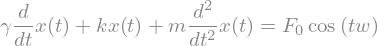

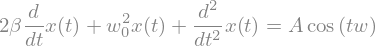

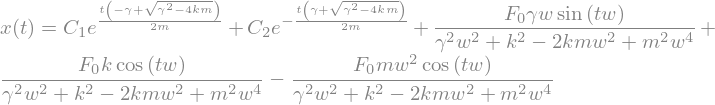

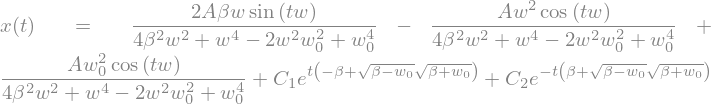

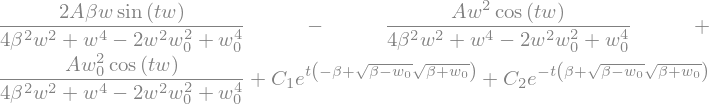

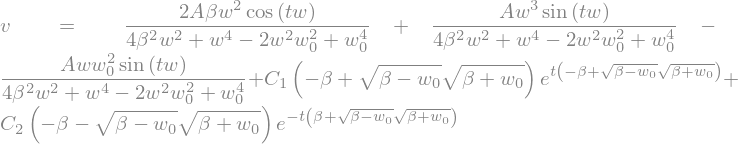

'The solution consists of two parts. The first part represents             the complementary solution containing initial conditions denoted by the             constants of integration C1 and C2. The second part is the particular             solution free of any constant of integration. This part is present in any case             independent of the initial conditions.'

'General Solution'

'x(t)='

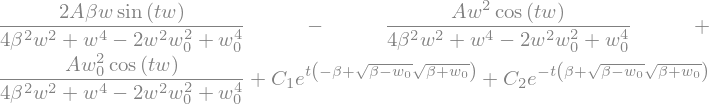

'Particular Solution'

'C1->0, C2->0'

'x_p(t)='

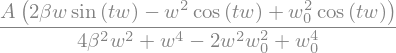

'Complementary Solution'

'x_c(t)='

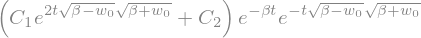

'Amplitude'

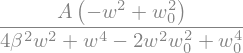

'Scaled amplitude= delta = Delta/A'

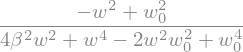

'Phase='

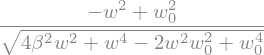

'Amplitude='

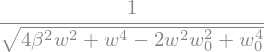

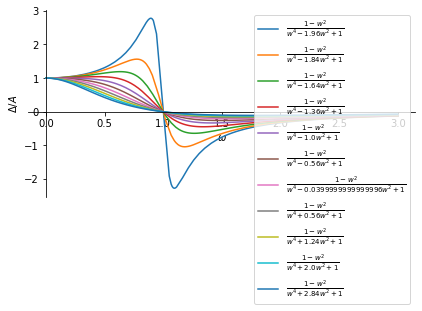

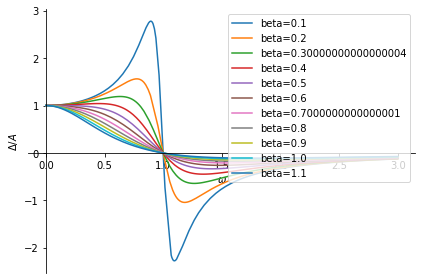

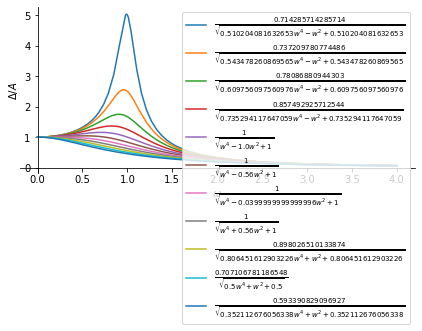

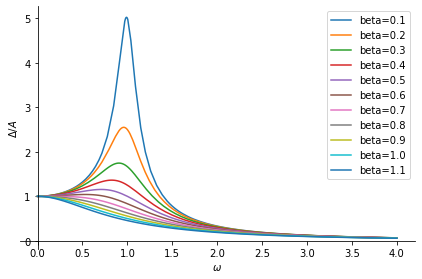

'Solution of Driven Oscillator Differential Equation'

'x(t)'

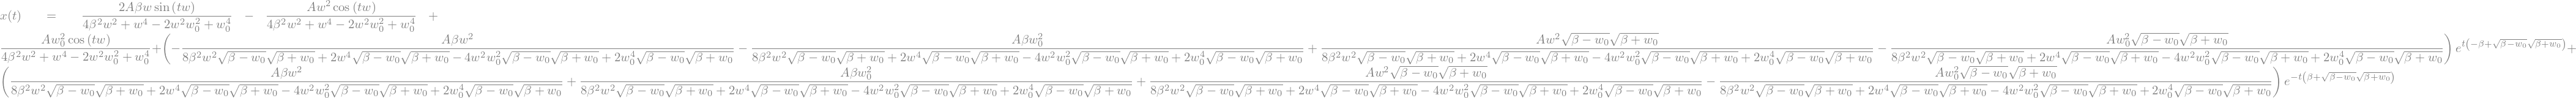

'simplified solution x(t)'

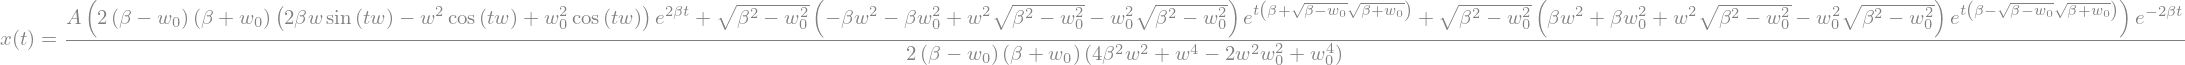

'with initial conditions'

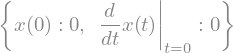

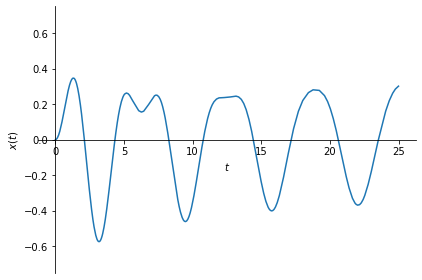

In [9]:
#----> Driven_Oscillations
if "Driven_Oscillations" in sets.flow: 
    # simple_harmonic_oscillator_scalar
    # General Solution
    pprints("2.4.8.5 Driven Oscillations, p145",
           "General Solution")
    omech.__init__("scalar")
    omech.verbose = False
    pprints("Differential Equation",
            omech.driven_oscillator1,
            omech.driven_oscillator2)
    commands = ["dsolve", "driven_oscillator1", omech.x]
    omech.process(commands)
    commands = ["dsolve", "driven_oscillator2", omech.x]
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    display(omech.x, v)
    
    # General Solution
    sol_particular = simplify(omech.x.subs({C1:0,C2:0}))
    sol_complementary = together(simplify(omech.x-sol_particular))
    amplitude = sol_particular.subs({t:0})
    omech.scaled_amplitude = scaled_amplitude = sol_particular.subs({t:0})/A
    omech.phase = numer(omech.scaled_amplitude)/sqrt(denom(omech.scaled_amplitude))
    omech.amplitude = 1/sqrt(denom(omech.scaled_amplitude))
    
    pprints(
            """The solution consists of two parts. The first part represents \
            the complementary solution containing initial conditions denoted by the \
            constants of integration C1 and C2. The second part is the particular \
            solution free of any constant of integration. This part is present in any case \
            independent of the initial conditions.""",
            "General Solution",
            "x(t)=", omech.x,
            "Particular Solution",
            "C1->0, C2->0",
            "x_p(t)=", sol_particular,
            "Complementary Solution",
            "x_c(t)=", sol_complementary,
            "Amplitude", amplitude,
            "Scaled amplitude= delta = Delta/A", scaled_amplitude,
            "Phase=", omech.phase,
            "Amplitude=", omech.amplitude)
    
    # Numerical calculations.
    # Plot scaled amplitude versus w.
    fixed_vals = {A:1, w0:1}
    param_vals = np.arange(0.1,1.2,0.1)
    A_w_funcs = get_iterated_functions(omech.scaled_amplitude, fixed_vals, beta, param_vals)
    p = plot(*A_w_funcs, (w,0,3,200), xlabel=r"$\omega$", ylabel=r"$\Delta /A$", legend=True)
    for i,ival in enumerate(np.arange(0.1,1.2,0.1)): p[i].label = "beta="+str(ival) # Prepare legend texts.
    p.show()
    
    # Plot amplitude versus w.
    A_w_funcs = get_iterated_functions(omech.amplitude, fixed_vals, beta, param_vals)
    p = plot(*A_w_funcs, (w,0,4), xlabel=r"$\omega$", ylabel=r"$\Delta /A$", legend=True)
    for i,ival in enumerate(np.arange(0.1,1.2,0.1)): p[i].label = "beta="+f"{ival:.1f}" # Prepare legend texts.
    p.show()
        
    # Solve Driven Oscillator Differential Equation
    omech.class_type = "scalar"
    omech.__init__()
    omech.verbose = True    
    initial_conds = {omech.x.subs({t:0}):0,
                     diff(omech.x, t).subs({t:0}):0}
    
    """
    OR todo fix errros.
    commands = ["dsolve", "driven_oscillator2", omech.x, initial_conds]
    omech.x = omech.process(commands).rhs
    """
    omech.x = dsolve(omech.driven_oscillator2, 
                     omech.x, 
                     ics = initial_conds)
    
    pprints("Solution of Driven Oscillator Differential Equation",
            "x(t)", omech.x,
            "simplified solution x(t)", simplify(omech.x),
            "with initial conditions",
            initial_conds)
        
    # Plot x(t).
    numvals = {A:1, beta:0.1, w0:2, w:1}
    x_t = omech.x.rhs.evalf(subs=numvals) # x_t = omech.x.srhs.ubs(numvals)
    plot(x_t, (t,0,25,300), xlabel="$t$", ylabel="$x(t)$", ylim=(-0.75,0.75))

## Driven_Oscillations_The_Laplace_Transform_Method

'2.4.8.6a Solution Procedures of Linear Differential Equations, p154'

'The Laplace Transform Method'

'Differential Equation of The Driven Oscillator'

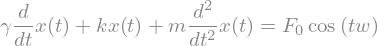

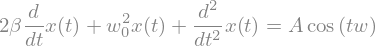

'laplace_transform(exp(-alpha*t), t, p)='

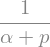

'Laplace transform of the differential equation'

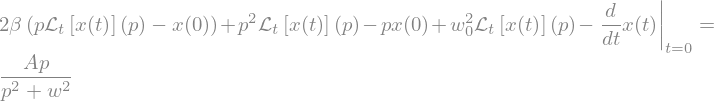

'Apply initial conditions to Laplace transform'

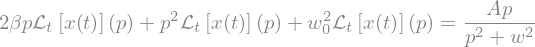

'Solve algebraic equation for L(x(t))'

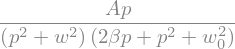

'laplace_transform driven_oscillator2 (t, p)'

Laplace transform of the driven_oscillator2 equation.
Eq(laplace_transform(2*beta*Derivative(x(t), t) + w0**2*x(t) + Derivative(x(t), (t, 2)), t, p), laplace_transform(A*cos(t*w), t, p, noconds=True))


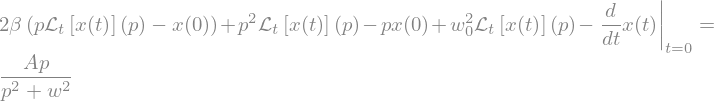

'subs omech.result {x(0): 0, Subs(Derivative(x(t), t), t, 0): 0}'

Eq(2*beta*(p*LaplaceTransform(x(t), t, p) - x(0)) + p**2*LaplaceTransform(x(t), t, p) - p*x(0) + w0**2*LaplaceTransform(x(t), t, p) - Subs(Derivative(x(t), t), t, 0), A*p/(p**2 + w**2))(subs, {x(0): 0, Subs(Derivative(x(t), t), t, 0): 0})


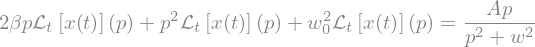

'solve omech.result LaplaceTransform(x(t), t, p)'

solve(Eq(2*beta*p*LaplaceTransform(x(t), t, p) + p**2*LaplaceTransform(x(t), t, p) + w0**2*LaplaceTransform(x(t), t, p), A*p/(p**2 + w**2)), LaplaceTransform(x(t), t, p))


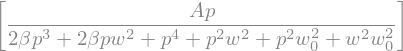

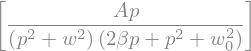

Times[Global`A, Plus[Times[Rational[-1, 2], Power[Plus[Power[Global`beta, 2], Times[-1, Power[Global`w0, 2]]], Rational[-1, 2]], Power[Plus[Times[4, Power[Global`beta, 2], Power[Global`w, 2]], Power[Global`w, 4], Times[-2, Power[Global`w, 2], Power[Global`w0, 2]], Power[Global`w0, 4]], -1], Plus[Times[-1, Global`beta, Power[E, Times[Global`t, Plus[Times[-1, Global`beta], Times[-1, Power[Plus[Power[Global`beta, 2], Times[-1, Power[Global`w0, 2]]], Rational[1, 2]]]]]], Power[Global`w, 2]], Times[Global`beta, Power[E, Times[Global`t, Plus[Times[-1, Global`beta], Power[Plus[Power[Global`beta, 2], Times[-1, Power[Global`w0, 2]]], Rational[1, 2]]]]], Power[Global`w, 2]],  4 , Times[Power[E, Times[Global`t, Plus[Times[-1, Global`beta], Times[-1, Power[Plus[Power[Global`beta, 2], Times[-1, Power[Global`w0, 2]]], Rational[1, 2]]]]]], Power[Global`w0, 2], Power[Plus[Power[Global`beta, 2], Times[-1, Power[Global`w0, 2]]], Rational[1, 2]]], Times[Power[E, Times[Global`t, Plus[Times[-1, Global`beta

In [3]:
#----> Driven_Oscillations_The_Laplace_Transform_Method
if "Driven_Oscillations_The_Laplace_Transform_Method" in sets.flow:
    pprints("2.4.8.6a Solution Procedures of Linear Differential Equations, p154",
           "The Laplace Transform Method")
    
    """
    sudo pip3 install wolframclient
    from wolframclient.evaluation import WolframLanguageSession
    from wolframclient.language import wl, wlexpr
    session = WolframLanguageSession()
    
    math_expr = "InverseLaplaceTransform[{0}, p, t]".format(mathematica_code(sol_IC_lap_trans))
    math_result = session.evaluate(wlexpr(math_expr))
    convert_str = 'ExportString[{0}, "PythonExpression"]'.format(math_result)
    session.evaluate(wlexpr(convert_str))
    """
    omech.__init__("scalar")
    omech.verbose = True
    
    pprints("Differential Equation of The Driven Oscillator",
            omech.driven_oscillator1,
            omech.driven_oscillator2,
            "laplace_transform(exp(-alpha*t), t, p)=",
            laplace_transform(exp(-alpha*t), t, p, noconds=True))
    
    # Laplace Transform Method
    # 1. Way: By using sympy.
    lap_trans = Eq(laplace_transform(omech.driven_oscillator2.lhs, t, p),
                   laplace_transform(omech.driven_oscillator2.rhs, t, p, noconds=True))
    IC_lap_trans = lap_trans.subs({omech.x.subs({t:0}):0, diff(omech.x, t).subs({t:0}):0})  # Set initial conditions.
    sol_IC_lap_trans = factor(solve(IC_lap_trans, LaplaceTransform(omech.x, t, p)))[0]      # Solve for L(x(t))

    pprints("Laplace transform of the differential equation",
            lap_trans,
            "Apply initial conditions to Laplace transform",
            IC_lap_trans,
            "Solve algebraic equation for L(x(t))",
            sol_IC_lap_trans)

    # 2. Way: By using libphysics.
    substitutions = {omech.x.subs({t:0}):0, diff(omech.x, t).subs({t:0}):0}
    commands = ["laplace_transform", "driven_oscillator2", (t,p)]
    omech.process(commands)
    commands = ["subs", "omech.result", substitutions]
    omech.process(commands)
    commands = ["solve", "omech.result", LaplaceTransform(omech.x, t, p)]
    display(factor(omech.process(commands)))
    
    # sol_diffeq = inverse_laplace_transform(sol_IC_lap_trans, p, t)
    
    # Plot x(t) graph.
    # fixed_vals = {A:1, w0:2, beta:4, w:1}
    # x_t = simplify(sol_diffeq.subs(fixed_vals))
    # plot(x_t, (t,0,25,500), xlabel="$t$", ylabel="$x(t)$")
    
    # Calling Mathematica for evaluating the inverse Laplace transformation.
    # 1. Way sympy -> latex -> evaluate ERROR PRONE!!! in multiplications.
    """
    # Ap != A*p becomes after latex conversion.
    
    import re
    from sympy.parsing.mathematica import parse_mathematica
    from sympy.parsing.latex import parse_latex
    session = WolframLanguageSession()
    
    inputTex = latex(sol_IC_lap_trans)
    inputMath = f'ToExpression["{inputTex}", TeXForm]'
    math_expr = f"InverseLaplaceTransform[{inputMath}, p, t]"
    math_expr = re.sub(r'\\', r'\\\\', math_expr)
    math_result = session.evaluate(wlexpr(math_expr))
    math_result = str(math_result).replace("<<","").replace(">>", "")
    pprint(parse_mathematica(math_result))
    """
    
    # Call Mathematica for evaluating the inverse Laplace transformation.
    # 2. Way sympy -> evaluate
    from sympy.parsing.mathematica import parse_mathematica
    session = WolframLanguageSession()
    math_expr = wlexpr(mathematica_code(sol_IC_lap_trans))
    math_expr = str(math_expr).replace("w_0","w0")
    math_expr = f"InverseLaplaceTransform[{math_expr}, p, t]"
    math_result = session.evaluate(session.normalize_input(math_expr))
    math_result = str(math_result).replace("<<","").replace(">>", "")
    # parse_mathematica(math_result)
    print(math_result)

## Driven_Oscillations_Greens_Function_Method

'2.4.8.6b Solution Procedures of Linear Differential Equations, p158'

"Green's Function Method"

"FAILED at Green's Function Implementation !!!"

'subs driven_oscillator3 {x(t): G(t, tau), F0*cos(t*w): DiracDelta(t - tau)}'

Eq(2*gamma*m*Derivative(x(t), t) + m*w0**2*x(t) + m*Derivative(x(t), (t, 2)), F0*cos(t*w))(subs, {x(t): G(t, tau), F0*cos(t*w): DiracDelta(t - tau)})


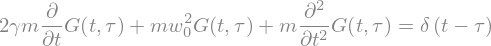

'subs omech.result {G(t, tau): sqrt(2)*Integral(Gtilde(w)*exp(I*w*(t - tau)), w)/(2*sqrt(pi))}'

Eq(2*gamma*m*Derivative(G(t, tau), t) + m*w0**2*G(t, tau) + m*Derivative(G(t, tau), (t, 2)), DiracDelta(t - tau))(subs, {G(t, tau): sqrt(2)*Integral(Gtilde(w)*exp(I*w*(t - tau)), w)/(2*sqrt(pi))})


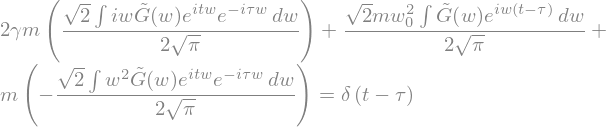

'subs omech.result {DiracDelta(t - tau): Integral(exp(I*w*(t - tau)), w)/(2*pi)}'

Eq(sqrt(2)*gamma*m*Integral(I*w*Gtilde(w)*exp(I*t*w)*exp(-I*tau*w), w)/sqrt(pi) + sqrt(2)*m*w0**2*Integral(Gtilde(w)*exp(I*t*w)*exp(-I*tau*w), w)/(2*sqrt(pi)) - sqrt(2)*m*Integral(w**2*Gtilde(w)*exp(I*t*w)*exp(-I*tau*w), w)/(2*sqrt(pi)), DiracDelta(t - tau))(subs, {DiracDelta(t - tau): Integral(exp(I*w*(t - tau)), w)/(2*pi)})


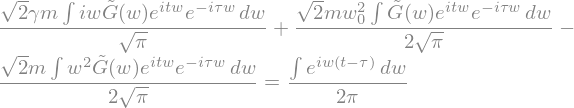

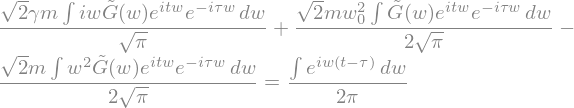

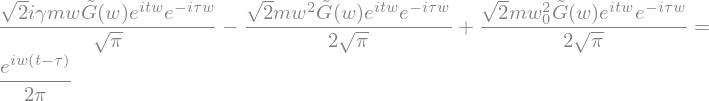

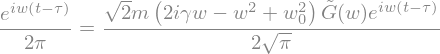

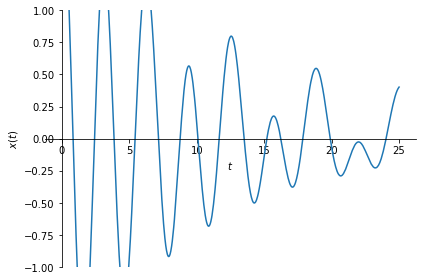

'G(t,tau)='

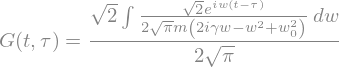

'Take integral and get G(t,tau).'

'x(t) = x_homogeneous + integrate(G(t,tau)*f(t), t)'

'Complementary Solution'

'x_c(t)='

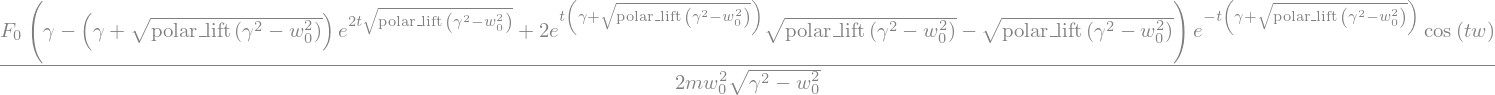

In [6]:
#----> Driven_Oscillations_Greens_Function_Method
if "Driven_Oscillations_Greens_Function_Method" in sets.flow:
    pprints("2.4.8.6b Solution Procedures of Linear Differential Equations, p158",
           "Green's Function Method",
           "FAILED at Green's Function Implementation !!!")
    """
    G_conds = {omech.G.subs({t:0}):omech.G_t_tau.subs({t:tau, tau:tau}),
               diff(omech.G, t).subs({t:0}):diff(omech.G_t_tau.subs({t:tau, tau:tau}),t)}
    
    References:
        Dean G. Duffy, Greens Functions with Applications, 2nd Edition, CRC Press, 2015.
    """
    omech.__init__("scalar")
    omech.verbose = True
    
    substitutions = {omech.x:omech.G, omech.driven_oscillator3.rhs:DiracDelta(t-tau)}
    commands = ["subs", "driven_oscillator3", substitutions]
    omech.process(commands)
    eq_green_func = omech.result
    
    method = {1:"Laplace_transform", 2:"Fourier_transform"}[2]
    if method == "Laplace_transform":
        # Laplace Transform Method
        """
        Laplace transform in sympy cannot handle functions with more than 1 variable.
        """
    #    lap_trans = Eq(laplace_transform(green_func_eq.lhs, t, p, noconds=True),
    #                   laplace_transform(green_func_eq.rhs, t, p, noconds=True))
    #    IC_lap_trans = lap_trans.subs({omech.G(t,tau):omech.G(0,tau), diff(omech.G(t,tau), t):diff(omech.G(0,tau), t)})  # Set initial conditions.
        # sol_IC_lap_trans = factor(solve(IC_lap_trans, LaplaceTransform(omech.G(t,tau), t, p)))[0]      # Solve for L(x(t))
    
        # Intial conditions
        # IC1 = Eq(G, 0)
        # IC2 = Eq(diff(G, t), 1)
        # sol1 = solve([IC1, IC2], [omech.G.subs({t:0}), diff(omech.G, t).subs({t:0})])
        # display(sol1)
    
    elif method == "Fourier_transform":
        # Fourier Transform Method
        """
        fourier_trans = Eq(fourier_transform(eq_green_func.lhs, t, k, noconds=True),
                           fourier_transform(DiracDelta(t-tau), t, k, noconds=True))
        sol_fourier_trans = solve(expand(fourier_trans), fourier_transform(omech.G, t, k))[0]
        sol_G = inverse_fourier_transform(sol_fourier_trans, k, t)
        """
        substitutions = {omech.G:omech.IFT_Gw.rhs}
        commands = ["subs", "omech.result", substitutions]
        omech.process(commands)
        omech.result = omech.result.doit()
        substitutions = {DiracDelta(t-tau):omech.IFT_Dirac_delta.rhs}
        commands = ["subs", "omech.result", substitutions]
        omech.process(commands)
        display(omech.result)
        eq_IFT_green_func1 = Eq(diff(omech.result.lhs, w), diff(omech.result.rhs, w))
        eq_IFT_green_func2 = simplify(eq_IFT_green_func1)
        display(eq_IFT_green_func1, eq_IFT_green_func2)    
        
        # eq_diff_green_func = Eq(diff(eq_green_func.lhs, w), diff(eq_green_func.rhs, w))
        sol_Gw = solve(eq_IFT_green_func2, omech.Gw)[0]   
        sol_Gt = omech.IFT_Gw.subs(omech.Gw, sol_Gw)

        # Sympy cannot solve the integral.
        # sol = integrate(sol_Gt.args[-1].args[0], w)
        # sol = integrate(sol_Gt.args[-1].args[0], (w, -inf, inf))
        
        # todo check below.
        # x(t) = x_homogeneous(t) + integrate(f(t)*G(t,tau), (tau,0,t))
        sol_complementary = simplify(integrate(omech.G_driven_oscillator_critical_damping*omech.driven_oscillator3.rhs, (tau, 0, t)))
        sol_complementary = simplify(integrate(omech.G_driven_oscillator_weak_damping*omech.driven_oscillator3.rhs, (tau, 0, t)))
        sol_complementary = simplify(integrate(omech.G_driven_oscillator_strong_damping*omech.driven_oscillator3.rhs, (tau, 0, t)))
        
        omech.x = dsolve(Eq(omech.driven_oscillator2.lhs, 0), omech.x)
        omech.x = omech.x.rhs + sol_complementary
    
        # Plot x(t).
        numvals = {A:1, beta:0.1, w0:2, w:1, m:1, F0:1, gamma:0.2, C1:1, C2:1}
        x_t = omech.x.evalf(subs=numvals) # x_t = omech.x.srhs.ubs(numvals)
        plot(x_t, (t,0,25,300), xlabel="$t$", ylabel="$x(t)$", ylim=(-1,1))
            
        pprints("G(t,tau)=", sol_Gt,
                "Take integral and get G(t,tau).",
                "x(t) = x_homogeneous + integrate(G(t,tau)*f(t), t)",
                "Complementary Solution",
                "x_c(t)=", sol_complementary
                )

## 2.6 Calculus of Variations

----2.6 Calculus of Variations

### 2.6.3 Euler's Equation   

In [ ]:
#----> Euler's Equation
if "Eulers_Equation" in sets.flow:
    pprints("2.6.3 Euler’s Equation")
    """
    References:
        https://github.com/cnkndmr/brachistochrone-problem/blob/master/shortest_path.ipynb
    """
    omech.__init__("EulerLagrange")
    omech.verbose = True
    pprints("Euler Equation",
            omech.Eulers_equation)

### 2.6.5 Algorithm Used in the Calculus of Variations

### 2.6.5.1 Brachystochrone

In [8]:
#----> 2.6.5.1 Brachystochrone_Baumann
if "Brachystochrone_Baumann" in sets.flow:
    pprints("2.6.5.1 Brachystochrone")
    pprints("Baumann's Approach")
    pprints("Includes ERROR !!!. Check It !!!")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    
    u,v = [Function('u')(t), Function('v')(t)]
    a, g, theta = symbols('a g theta', real=True, positive=True)
    f = Eq(omech.f, sqrt((1 + diff(omech.u, t, evaluate=False)**2)/(2*g*t)))
    brachystochrone_eq = simplify(omech.Eulers_equation_1D(f.rhs, [u, diff(u, t, evaluate=False)], t)[0].doit())
    steps = omech.Eulers_equation_1D(f.rhs, [u, diff(u, t, evaluate=False)], t)[1]
    
    num_brachystochrone_eq = Eq(numer(brachystochrone_eq.lhs), 0)
    diffeq_inner = simplify(simplify( Eq(steps[1].rhs**2, (1/(2*sqrt(a*g)))**2) ))
    du_dx = solve(diffeq_inner, u.diff(t))[1]
    subs_int = {t:a*(1-cos(theta))}
    dtheta = diff(a*(1-cos(theta)), theta)
    du_dx_transformed = simplify(du_dx.xreplace(subs_int))
    sol_int = du_dx_transformed*dtheta
#    sol_int = simplify(dsolve(diffeq_inner, u, ics={u.subs({t:a}):0})[0].subs(C1,0))
    
    # Do integration with sage
    import sage.all as sg # this is mandatory to initialize Sage
    a,theta = sg.var('a theta')
    sol_x = simplify(sympify(sg.integrate(sol_int, theta)))
    
    pprints(f,
        "Euler equation calculation steps",
        *steps,
        "Brachystochrone Equation",
        brachystochrone_eq,
        "Numerator of the Brachystochrone equation",
        num_brachystochrone_eq,
        "A simple differential equation obtained from Euler equation calculation",
        diffeq_inner,
        du_dx_transformed,
        "u'(x)=", du_dx,
        "u(x)=", sol_x,
        )
    
    # Plot u(x).
    numvals = {a:2}
    u_x = sol_x.evalf(subs=numvals)
    x_funcs  = [-a.subs(numvals)*(1-cos(theta)), -a.subs(numvals)*(1-cos(theta))]
    ux_funcs = [-u_x, u_x]
    p = plot_parametric(*list(zip(x_funcs, ux_funcs)),
                              (theta,0,float(2*pi),200), 
                              xlabel="x", ylabel="u(x)")

'2.6.5.1 Brachystochrone'

"Baumann's Approach"

'Includes ERROR !!!. Check It !!!'

ModuleNotFoundError: No module named 'sage'

### 2.6.5.1 Brachystochrone_Wachter

In [9]:
#----> 2.6.5.1 Brachystochrone_Wachter
if "Brachystochrone_Wachter" in sets.flow:
    pprints("2.6.5.1 Brachystochrone")
    pprints("Wachter's Approach")
    pprints("Includes ERROR !!!. Check It !!!")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    
    x = Symbol('x')
    y = Function('y')(x)
    r = Matrix([[x], [y]])
    h, g = symbols('h g', real=True, positive=True)
    f = Eq( omech.f, 1/sqrt(2*g)*sqrt((1+y.diff(x)**2)/(h-y)) )
    brachystochrone_eq = simplify(omech.Eulers_equation_1D(f.rhs, [y, diff(y, x, evaluate=False)], x)[0].doit())
    num_brachystochrone_eq = Eq(numer(brachystochrone_eq.lhs), 0)
#    sol = dsolve(num_brachystochrone_eq, y) # cannot be solved by the factorable group method
    sol = solve(num_brachystochrone_eq, y.diff(x,2))[0]
    
    import sage.all as sg # this is mandatory to initialize Sage
    x,h = sg.var('x h')
    y = sg.function('y')(x)
    sol = sg.desolve(diff(y,x,2) - sol == 0, dvar=y, ivar=x)
    pprints("Solution", sol)

'2.6.5.1 Brachystochrone'

"Wachter's Approach"

'Includes ERROR !!!. Check It !!!'

ModuleNotFoundError: No module named 'sage'

### 2.6.6 Euler Operator for q Dependent Variables

'2.6.6 Euler Operator for q Dependent Variables'

'2.6.6.1 Two-Dimensional Oscillator System by libphysics'

'l='

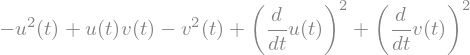

'The corresponding system of second-order equations follows by'

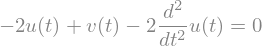

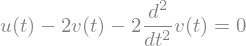

'2.6.6.1 Two-Dimensional Oscillator System by SymPy'

'l='

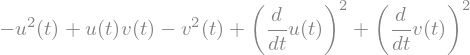

'The corresponding system of second-order equations follows by'

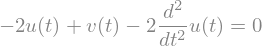

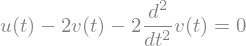

'2.6.6.2 Two-Dimensional Lagrangian by libphysics'

'l='

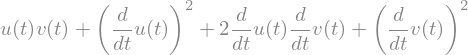

'The corresponding Euler–Lagrange equations read'

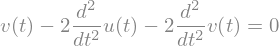

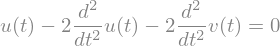

In [10]:
#----> 2.6.6 Euler Operator for q Dependent Variables
if "Euler_Operator" in sets.flow:
    pprints("2.6.6 Euler Operator for q Dependent Variables")
    omech.__init__("EulerLagrange")
    omech.verbose = True    
    q,u,v = [Function('q')(t), Function('u')(t), Function('v')(t)]
    
    #----> Lagrangian Density
    """
    l = t + q + q.diff(t)
    eu_eq_q = simplify(omech.Eulers_equation_1D(l, [q, q.diff(t)], [t])[0])
    pprints("2.6.6 Euler Operator for q Dependent Variables",
            "l=", l,
            eu_eq_q)
    """
    
    
    #----> Two-Dimensional Oscillator System
    l = u*v + (u.diff(t))**2 + (v.diff(t))**2 - u**2 - v**2
    eu_eq_u,steps_u = simplify(omech.Eulers_equation_1D(l, [u, u.diff(t)], t))
    eu_eq_v,steps_v = simplify(omech.Eulers_equation_1D(l, [v, v.diff(t)], t))
    pprints("2.6.6.1 Two-Dimensional Oscillator System by libphysics",
            "l=", l,
            "The corresponding system of second-order equations follows by",
            eu_eq_u,
            eu_eq_v)
    
    # Correct Way.
    eu_eqs = euler_equations(l, [u,v], t)
    pprints("2.6.6.1 Two-Dimensional Oscillator System by SymPy",
            "l=", l,
            "The corresponding system of second-order equations follows by",
            *eu_eqs)
    

    #----> Two-Dimensional Lagrangian
    l = u*v + (u.diff(t))**2 + (v.diff(t))**2 + 2*u.diff(t)*v.diff(t)
    eu_eq_u, steps_u = simplify(omech.Eulers_equation_1D(l, [u, u.diff(t)], t))
    eu_eq_v, steps_v = simplify(omech.Eulers_equation_1D(l, [v, v.diff(t)], t))
    pprints("2.6.6.2 Two-Dimensional Lagrangian by libphysics",
            "l=", l,
            "The corresponding Euler–Lagrange equations read",
            eu_eq_u,
            eu_eq_v)

### 2.6.7 Euler Operator for q + p Dimensions

'2.6.7 Euler Operator for q + p Dimensions'

'Example1: Quadratic Density'

'Euler Operator for q + p Dimensions is Not Impelemented in mechanics.py'

'Example 1: Quadratic Density'

'f='

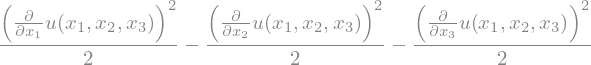

'eu_eq_ux1='

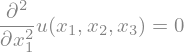

'eu_eq_ux2='

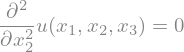

'eu_eq_ux3='

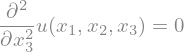

'res='

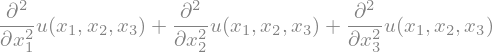

In [11]:
#----> 2.6.7 Euler Operator for q + p Dimensions
if "2.6.7 Euler Operator for q + p Dimensions" in sets.flow:
    pprints("2.6.7 Euler Operator for q + p Dimensions",
            "Example1: Quadratic Density",
            "Euler Operator for q + p Dimensions is Not Impelemented in mechanics.py")
    omech.__init__("EulerLagrange")
    omech.verbose = True    
    
    """
    # IndexedBased Functions with Function
    x = IndexedBase('x', shape=(3))
    u = Function('u')(x[1], x[2], x[3])
    du_dx1 = u.diff(x[1])
    pprints("x=", x,
            "u=", u,
            "du_dx1=", du_dx1)
    
    # IndexedBased Functions with Lambda Function
    # ValueError: 
    #    Can not calculate derivative wrt Lambda((x[1], x[2], x[3]), u(x[1],
    #    x[2], x[3])).
    x = IndexedBase('x', shape=(3))
    u = Lambda((x[1], x[2], x[3]), Function('u')(x[1],x[2],x[3]))
    du_dx1 = u(x[1],x[2],x[3]).diff(x[1])
    pprints("x=", x,
            "u=", u,
            "du_dx1=", du_dx1)
    """
#    Example 1: Quadratic Density
    x = IndexedBase('x', shape=(3))
    u = Function('u')(x[1], x[2], x[3])
    f = S(1)/2*(u.diff(x[1])**2 - u.diff(x[2])**2 - u.diff(x[3])**2)
    eu_eq_ux1 = simplify(omech.Eulers_equation_1D(f, [u, u.diff(x[1])], x[1])[0])
    eu_eq_ux2 = simplify(omech.Eulers_equation_1D(f, [u, u.diff(x[2])], x[2])[0])
    eu_eq_ux3 = simplify(omech.Eulers_equation_1D(f, [u, u.diff(x[3])], x[3])[0])
    res1 = simplify( eu_eq_ux1.lhs + eu_eq_ux2.lhs + eu_eq_ux3.lhs )
    pprints("Example 1: Quadratic Density",
            "f=", f,
            "eu_eq_ux1=", eu_eq_ux1,
            "eu_eq_ux2=", eu_eq_ux2,
            "eu_eq_ux3=", eu_eq_ux3,
            "res=", res1)

'Example 1: Quadratic Density, todo last sign is wrong'

'f='

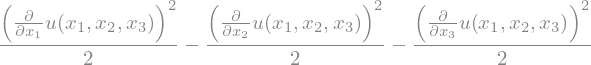

'eu_eqs='

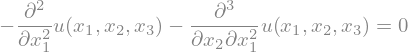

'Example 1: Quadratic Density'

'f='

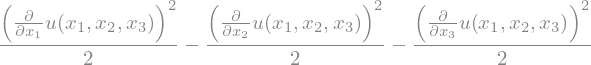

'The corresponding system of second-order equations follows by'

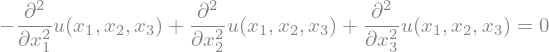

In [12]:
# Example 1: Quadratic Density
x1,x2,x3 = symbols('x_1,x_2,x_3', real=True)
u = Function('u')(x1, x2, x3)
f = S(1)/2*(u.diff(x1)**2 - u.diff(x2)**2 - u.diff(x3)**2)
eu_eqs, steps = simplify(omech.Eulers_equation_1D(f, [u,u.diff(x1),u.diff(x2)], x1))
pprints("Example 1: Quadratic Density, todo last sign is wrong",
        "f=", f,
        "eu_eqs=", eu_eqs)

# Correct Way.
eu_eqs = euler_equations(f, [u], [x1,x2,x3])
pprints("Example 1: Quadratic Density",
        "f=", f,
        "The corresponding system of second-order equations follows by",
        *eu_eqs)

'Example 2: Diffusion of Two Components'

'Lagrangian density = l='

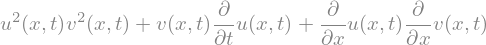

'eu_eq_ux='

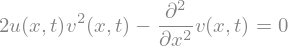

'eu_eq_ut='

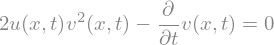

'eu_eq_vx='

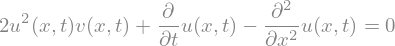

'eu_eq_vt='

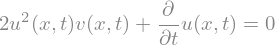

'res_u='

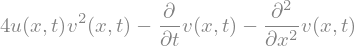

'res_v='

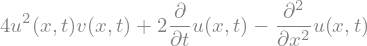

'Baumann found  = 2*u(x, t)*v(x, t)**2 - Derivative(v(x, t), t) - Derivative(v(x, t), (x, 2))'

'We found WRONG = 4*u(x, t)*v(x, t)**2 - Derivative(v(x, t), t) - Derivative(v(x, t), (x, 2))'

'Example 2: Diffusion of Two Components'

'Lagrangian density = l='

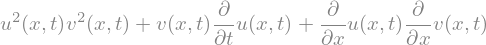

'Steps='

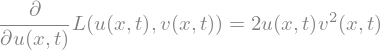

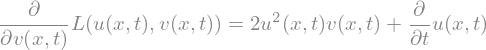

'The corresponding system of differential equations follows by'

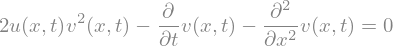

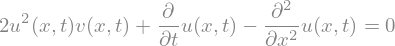

In [13]:
# Example 2: Diffusion of Two Components
t,x = symbols('t x', real=True)
u,v = [Function('u')(x,t), Function('v')(x,t)]
l = v*u.diff(t) + u.diff(x)*v.diff(x) + u**2*v**2
eu_eq_ux = simplify(omech.Eulers_equation_1D(l, [u,u.diff(x)], x)[0])
eu_eq_ut = simplify(omech.Eulers_equation_1D(l, [u,u.diff(t)], t)[0])
eu_eq_vx = simplify(omech.Eulers_equation_1D(l, [v,v.diff(x)], x)[0])
eu_eq_vt = simplify(omech.Eulers_equation_1D(l, [v,v.diff(t)], t)[0])
res_u = eu_eq_ux.lhs + eu_eq_ut.lhs
res_v = eu_eq_vx.lhs + eu_eq_vt.lhs
pprints("Example 2: Diffusion of Two Components",
    "Lagrangian density = l=", l,
    "eu_eq_ux=", eu_eq_ux,
    "eu_eq_ut=", eu_eq_ut,
    "eu_eq_vx=", eu_eq_vx,
    "eu_eq_vt=", eu_eq_vt,
    "res_u=", res_u,
    "res_v=", res_v,
    "Baumann found  = 2*u(x, t)*v(x, t)**2 - Derivative(v(x, t), t) - Derivative(v(x, t), (x, 2))",
    "We found WRONG = 4*u(x, t)*v(x, t)**2 - Derivative(v(x, t), t) - Derivative(v(x, t), (x, 2))"
    )

# Correct Way.
#    eu_eqs = euler_equations(l, [u,v], [x,t])
eu_eqs,steps = omech.Eulers_equation_sympy(l, [u,v], [x,t])
pprints("Example 2: Diffusion of Two Components",
        "Lagrangian density = l=", l,
        "Steps=", *steps,
        "The corresponding system of differential equations follows by",
        *eu_eqs)

### 2.7.2 Hamiltons Principle Historical Remarks

"2.7.2 Hamilton's Principle Historical Remarks"

'Lagrangian L = T - V'

"For velocity-independent potentials, Lagrange's equations become"

'Lagrangian= L='

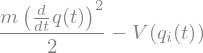

'Steps='

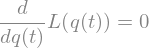

'The corresponding differential equation follows by'

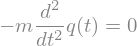

"which, in the case of cartesian coordinates, are just Newton's equations."

In [3]:
#----> 2.7.2 Hamiltons Principle Historical Remarks
if "2.7.2 Hamiltons Principle Historical Remarks" in sets.flow:
    pprints("2.7.2 Hamilton's Principle Historical Remarks")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    
    # Lagrangian L = T - V
    L = S(1)/2*m*q.diff()**2-V
    eu_eqs,steps = omech.Eulers_equation_sympy(L, [q], [t])
    pprints("Lagrangian L = T - V",
            "For velocity-independent potentials, Lagrange's equations become",
            "Lagrangian= L=", L,
            "Steps=", *steps,
            "The corresponding differential equation follows by",
            *eu_eqs,
            "which, in the case of cartesian coordinates, are just Newton's equations.")

### 2.7.3 Hamiltons Principle

'2.7.3 Hamiltons Principle'

'2.7.3.1 Example 1: Harmonic Oscillator'

'dsolve omech.result q(t)'

dsolve(Eq(-k*q(t) - Derivative(0, t), 0), q(t))


'Example 1: Harmonic Oscillator'

'T='

'V='

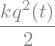

'Lagrangian= L='

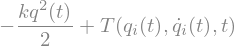

'Steps='

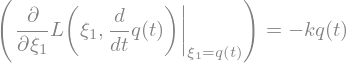

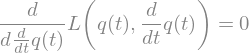

'The corresponding differential equation follows by'

'Solution of differential equation'

In [4]:
#----> 2.7.3 Hamiltons Principle
if "2.7.3.1 Example 1: Harmonic Oscillator" in sets.flow:    
    pprints("2.7.3 Hamiltons Principle")
    pprints("2.7.3.1 Example 1: Harmonic Oscillator")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    
    # Example 1: Harmonic Oscillator
    V = S(1)/2*k*q**2
    L = omech.T.rhs - V
#    eu_eqs,steps = omech.Eulers_equation_sympy(L, [q], [t]); eq_SHO = eu_eqs[0]
    eu_eqs,steps = omech.Eulers_equation_1D(L, [q,D(q)], t); eq_SHO = eu_eqs
    omech.result = eq_SHO
    commands = ["dsolve", "omech.result", q]
    omech.q = omech.process(commands)
    pprints("Example 1: Harmonic Oscillator",
            "T=", T, "V=", V,
            "Lagrangian= L=", L,
            "Steps=", *steps,
            "The corresponding differential equation follows by", eu_eqs,
            "Solution of differential equation", omech.q)

### 2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane

'2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane'

'1. Way: Eulers_equation_1D'

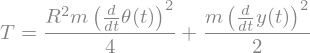

'Lagrangian='

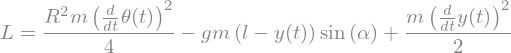

'Constraint equation='

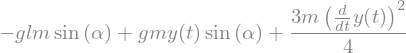

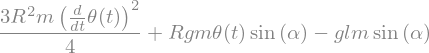

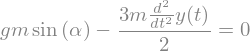

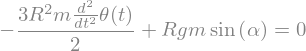

In [3]:
#----> 2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane
if "2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane" in sets.flow:
    # Prepare Lagrangian
    pprints("2.7.3.2 Example 2: Rolling Wheel on an Inclined Plane")
    pprints("1. Way: Eulers_equation_1D")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    calc_type = {1:"1. Way: Eulers_equation_1D",
                 2:"2. Way: Eulers_equation_sympy",
                 3:"3. Way: euler_equations",
                 4:"4. Way: Lagrange_equations_I"}[1]
    
    l,R = symbols('l R', real=True, positive=True)
    # fg  = Function('g')(t)
    Icm = Eq(var('I'), S(1)/2*m*R**2)
    T   = Eq(S('T'), S(1)/2*m*D(y,t)**2 + S(1)/2*var('I')*D(theta,t)**2)
    T   = T.xreplace({var('I'):Icm.rhs})
    V   = Eq(S('V'), m*g*(l-y)*sin(alpha))
    L   = Eq(S('L'), T.rhs-V.rhs)
    const_g = Eq(y-R*theta, 0)
    
    sol_theta = solve(const_g,theta)[0]
    Ly = ratsimp(simplify(L.rhs.subs({theta:sol_theta})))
    Ltheta = ratsimp(simplify(L.rhs.subs({y:R*theta})))
    
    eu_eq_y     = euler_equations(Ly, y, t)[0]
    eu_eq_theta = euler_equations(Ltheta, theta, t)[0]
    
    pprints(T,V,
            "Lagrangian=", L,
            "Constraint equation=", const_g,
            Ly, Ltheta, eu_eq_y, eu_eq_theta)

### 2.7.3.3 Example 3: Sliding Mass Connected to a Pendulum

'Example 3: Sliding Mass Connected to a Pendulum'

'1. Way: Eulers_equation_1D'

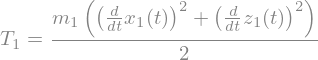

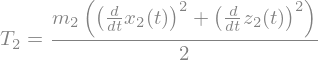

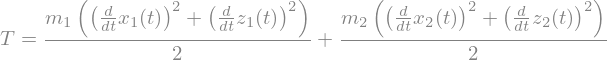

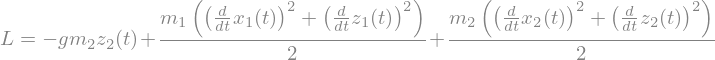

'2. Way: Eulers_equation_sympy'

'Steps='

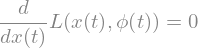

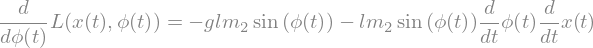

'Differential equation for x(t)'

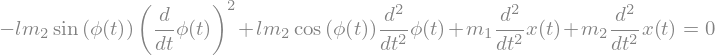

'Differential equation for phi(t)'

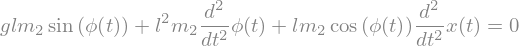

'Solution of ODEs:'

'Reduction of derivatives:'

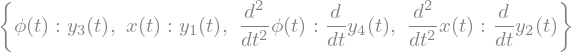

'ODEs:'

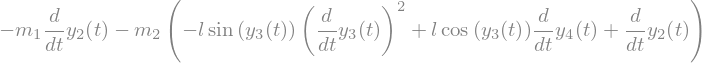

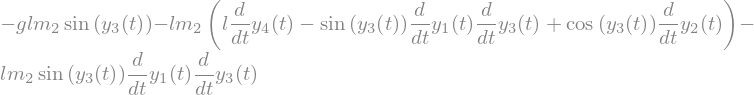

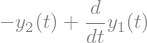

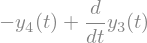

'New ODEs:'

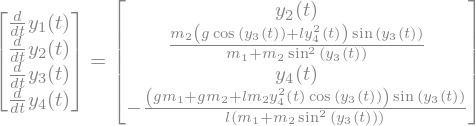

'Jacobian Matrix of the System:'

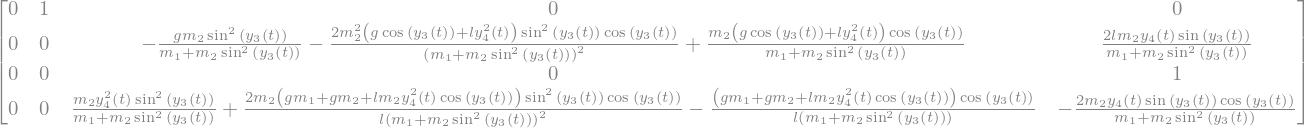

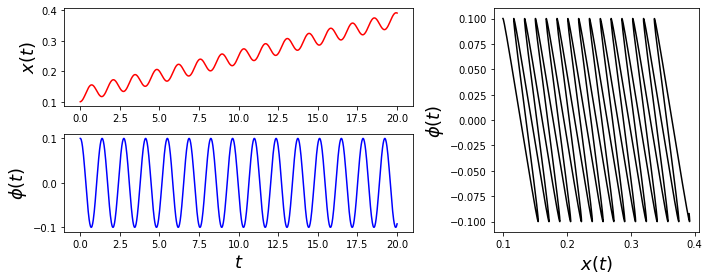

In [6]:
#----> 2.7.3.3 Example 3: Sliding Mass Connected to a Pendulum
if "2.7.3.3 Example 2: Sliding Mass Connected to a Pendulum" in sets.flow:
    # Prepare Lagrangian
    pprints("Example 3: Sliding Mass Connected to a Pendulum")
    pprints("1. Way: Eulers_equation_1D")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    calc_type = {1:"1. Way: Eulers_equation_1D", # todo solve bug
                 2:"2. Way: Eulers_equation_sympy",
                 3:"3. Way: euler_equations",
                 4:"4. Way: Lagrange_equations_I"}[2]
    
    l = symbols('l')
    T1 = Eq(symbols('T1'), S(1)/2*m1*(D(x1)**2 + D(z1)**2))
    T2 = Eq(symbols('T2'), S(1)/2*m2*(D(x2)**2 + D(z2)**2))
    V1 = Eq(symbols('V1'), 0)
    V2 = Eq(symbols('V2'), m2*g*z2)
    omech.T = Eq(symbols('T'), T1.rhs + T2.rhs)
    omech.V = Eq(symbols('V'), V1.rhs + V2.rhs)
    L = omech.L = Eq(symbols('L'), omech.T.rhs - omech.V.rhs)
    display(T1,T2,V1,V2,omech.T,omech.V,omech.L)
    
    # Transform to generalized coordinates
    generalized_coordinates = {x1:x, z1:0,
                               x2:x+l*sin(phi), z2:-l*cos(phi)}
    T = omech.T = omech.T.xreplace(generalized_coordinates)
    V = omech.V = omech.V.xreplace(generalized_coordinates)
    L = omech.L = Eq(symbols('L'), omech.T.rhs - omech.V.rhs)
    Lag = simplify(omech.L.doit())
    
    # Apply Euler-Lagrange operator
    if calc_type == "1. Way: Eulers_equation_1D":
        eu_eq_x, steps = omech.Eulers_equation_1D(Lag.rhs, [x,D(x)], t)
        sim_eu_eq_x = expand(simplify(eu_eq_x))
        eu_eq_phi, steps = omech.Eulers_equation_1D(Lag.rhs, [phi,D(phi)], t)
        sim_eu_eq_phi = expand(simplify(eu_eq_phi))
        pprints("1. Way: Eulers_equation_1D",
                "generalized_coordinates=", generalized_coordinates,
                T, T.doit(), V, V.doit(), L, L.doit(),
                "Lagrangian= L=", Lag,
                "Steps=", *steps,
                "Differential equation for x(t)", eu_eq_x, sim_eu_eq_x,
                "Differential equation for phi(t)", eu_eq_phi, sim_eu_eq_phi
                )
    if calc_type == "2. Way: Eulers_equation_sympy":   
        eu_eqs,steps = omech.Eulers_equation_sympy(Lag.rhs, [x,phi], t)
        eu_eq_x, eu_eq_phi = [eu_eqs[0], eu_eqs[1]]
        pprints("2. Way: Eulers_equation_sympy",
                "Steps=", *steps,
                "Differential equation for x(t)", expand(simplify(eu_eqs[0])),
                "Differential equation for phi(t)", expand(simplify(eu_eqs[1]))
                )
    if calc_type == "3. Way: euler_equations":   
        eu_eqs = euler_equations(Lag.rhs, [x,phi], t)
        eu_eq_x, eu_eq_phi = [eu_eqs[0], eu_eqs[1]]
        pprints("3. Way: euler_equations",
                "Differential equation for x(t)", expand(simplify(eu_eqs[0])),
                "Differential equation for phi(t)", expand(simplify(eu_eqs[1]))
                )
    if calc_type == "4. Way: Lagrange_equations_I":   
        substitutions  = {q_i:x, q_idot:D(x,t), omech.L.lhs:Lag.rhs}
        eu_eq_x = expand(simplify(omech.Lagrange_equations_I.xreplace(substitutions).doit()))
        substitutions  = {q_i:phi, q_idot:D(phi,t), omech.L.lhs:Lag.rhs}
        eu_eq_phi = expand(simplify(omech.Lagrange_equations_I.xreplace(substitutions).doit()))
        pprints("4. Way: Lagrange_equations_I",
                "Differential equation for x(t)",   eu_eq_x,
                "Differential equation for phi(t)", eu_eq_phi)
    
    if calc_type == "SymPy: A rolling disc using Lagrange's Method":
        print("todo")
    
    if calc_type == "SymPy: A rolling disc, with Kane’s method":
        print("todo")        
    
    # Solution of ODEs
    sol_ode = {0:False, 1:True}[1]
    if sol_ode:
        # Reduce 2nd order derivatives to 1st order derivatives.
        y1, y2, y3, y4 = symbols("y_1, y_2, y_3, y_4", cls=Function)
        varchange = {x.diff(t,t):y2(t).diff(t), 
                     x:y1(t),
                     phi.diff(t,t):y4(t).diff(t), 
                     phi:y3(t)}
        ode1, ode2 = [eu_eq_x.lhs.subs(varchange),
                      eu_eq_phi.lhs.subs(varchange)]
        ode3 = y1(t).diff(t) - y2(t)
        ode4 = y3(t).diff(t) - y4(t)
        
        y = Matrix([y1(t), y2(t), y3(t), y4(t)])
        vcsol = solve((ode1, ode2, ode3, ode4), y.diff(t), dict=True)
        f = y.diff(t).subs(vcsol[0])
        eq_S = Eq(y.diff(t), f)
        jac = Matrix([[fj.diff(yi) for yi in y] for fj in f])
        
        # Numerical calculations
        params = {m1:1, m2:0.5, l:0.7, g:9.81}
        f_np = lambdify((t, y), f.subs(params), 'numpy')
        jac_np = lambdify((t, y), jac.subs(params), 'numpy')
        
        # y0 = [x(0), x'(0), phi(0), phi'(0)]
        y0 = [0.1, 0.01, 0.1, 0.01]
        # y0 = [0.1, 0.1, 0.5, 0.9]
        t = np.linspace(0, 20, 1000)
        r = sp.integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]);
        dt = t[1] - t[0]
        y = np.zeros((len(t), len(y0)))
        idx = 0
        while r.successful() and r.t < t[-1]:
            y[idx, :] = r.y
            r.integrate(r.t + dt)
            idx += 1
            
        fig = plt.figure(figsize=(10, 4))
        ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
        ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
        ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
        
        ax1.plot(t, y[:, 0], 'r')
        ax1.set_ylabel(r'$x(t)$', fontsize=18)
        
        ax2.plot(t, y[:, 2], 'b')
        ax2.set_xlabel('$t$', fontsize=18)
        ax2.set_ylabel(r'$\phi(t)$', fontsize=18)
        
        ax3.plot(y[:, 0], y[:, 2], 'k')
        ax3.set_xlabel(r'$x(t)$', fontsize=18)
        ax3.set_ylabel(r'$\phi(t)$', fontsize=18)
        
        fig.tight_layout()
        
        pprints("Solution of ODEs:",
                "Reduction of derivatives:", varchange,
                "ODEs:", *[ode1,ode2,ode3,ode4],
                "New ODEs:", eq_S,
                "Jacobian Matrix of the System:", jac)

### 2.8 Hamiltonian Dynamics

'2.8.2.0 Motion in a uniform gravitational field'

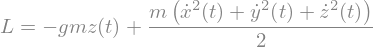

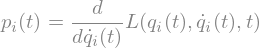

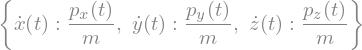

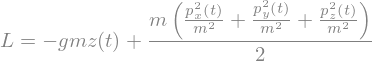

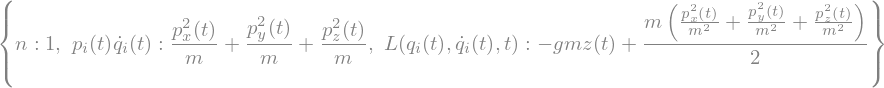

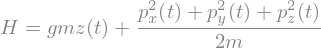

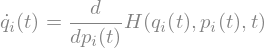

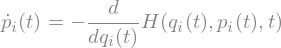

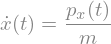

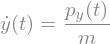

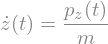

'Example 8.5.1 : Motion in a uniform gravitational field [Cline]'

'calc_type=2. Way'

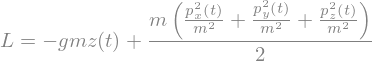

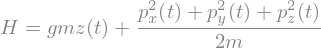

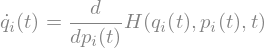

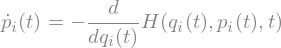

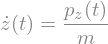

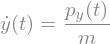

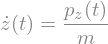

In [4]:
#----> 2.8.2.0 Motion in a uniform gravitational field
if "2.8.2.0 Motion in a uniform gravitational field" in sets.flow:
    # Prepare Lagrangian
    pprints("2.8.2.0 Motion in a uniform gravitational field")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    omech.T = Eq(S('T'), S(1)/2*m*(D(x)**2 + D(y)**2 + D(z)**2))
    omech.T = Eq(S('T'), S(1)/2*m*(xdot**2 + ydot**2 + zdot**2))
    omech.V = Eq(S('V'), m*g*z)
    omech.L = Eq(S('L'), omech.T.rhs - omech.V.rhs)

    calc_type = {1:"1. Way",
                 2:"2. Way"}[2]

    if calc_type == "1. Way":
        # 1. Way: Implementation step by step.    
        """
        1. Calculate generalize momenta by taking derivative of Lagrangian with respect to q_idot.
        2. Solve q_idots from generalize momenta equations.
        3. Replace q_idots in Lagrangian with corresponding generalize momenta.
        4. Replace pi*qidot in Hamiltonian with expressions written in terms of generalize momenta.
        5. Calculate qidot, p_idot, p_idot by Hamilton's equations. 
        """
    #    1. Calculate generalize momenta by taking derivative of Lagrangian with respect to q_idot.
        eq_px = omech.p_i.xreplace({L:omech.L.rhs, q_idot:xdot, p_i:px}).doit()
        eq_py = omech.p_i.xreplace({L:omech.L.rhs, q_idot:ydot, p_i:py}).doit()
        eq_pz = omech.p_i.xreplace({L:omech.L.rhs, q_idot:zdot, p_i:pz}).doit()
    #    2. Solve q_idots from generalize momenta equations.
        sol_xdot = solve(eq_px, xdot)[0]
        sol_ydot = solve(eq_py, ydot)[0]
        sol_zdot = solve(eq_pz, zdot)[0]
    #    3. Replace q_idots in Lagrangian with corresponding generalize momenta.
        sub_qidots = {xdot:sol_xdot, ydot:sol_ydot, zdot:sol_zdot}
        omech.L = omech.L.subs(sub_qidots)
    #    4. Replace pi*qidot in Hamiltonian with expressions written in terms of generalize momenta.
        piqidot = Matrix([[px,py,pz]]).dot(Matrix([[sol_xdot,sol_ydot,sol_zdot]]))
        substitutions = {n:1, L:omech.L.rhs, p_i*q_idot:piqidot}
        omech.H = simplify(omech.H.xreplace(substitutions).doit())
    #    5. Calculate qidot, p_idot by Hamilton's equations. 
        xdot = omech.q_idot.xreplace({H:omech.H.rhs, p_i:px, q_idot:xdot})
        ydot = omech.q_idot.xreplace({H:omech.H.rhs, p_i:py, q_idot:ydot})
        zdot = omech.q_idot.xreplace({H:omech.H.rhs, p_i:pz, q_idot:zdot})
    #    zdot = omech.Hamiltons_equations_I.xreplace({H:omech.H.rhs, p_i:pz, q_idot:zdot})
        pxdot = omech.p_idot.xreplace({H:omech.H.rhs, q_i:x, p_idot:pxdot})
        pydot = omech.p_idot.xreplace({H:omech.H.rhs, q_i:y, p_idot:pydot})
        pzdot = omech.p_idot.xreplace({H:omech.H.rhs, q_i:z, p_idot:pzdot})
    elif calc_type == "2. Way":
        # 2. Way: Implementation step by step.
        lst_qi    = [x,y,z]
        lst_qidot = [xdot, ydot, zdot]
        lst_pi    = [px,py,pz]
        lst_pidot = [pxdot, pydot, pzdot]
        [[xdot,ydot,xdot], [pxdot,pydot,pzdot]] = omech.Hamiltons_equations(omech.L, [x,y,z], [xdot, ydot, zdot],
                                                                                  [px,py,pz], [pxdot, pydot, pzdot])
        
    pprints("Example 8.5.1 : Motion in a uniform gravitational field [Cline]")
    display(f"calc_type={calc_type}",
            omech.L,
            omech.H, 
            omech.Hamiltons_equations_I, 
            omech.Hamiltons_equations_II,
            xdot,ydot,xdot,
            pxdot,pydot,pzdot)

### 2.8.2.1 Example 1: Moving Beat on a String

'2.8.2.1 Example 1: Moving Beat on a String'

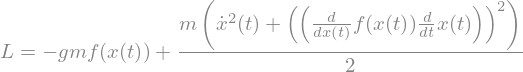

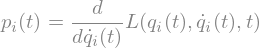

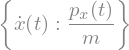

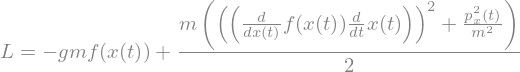

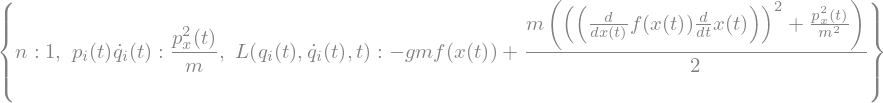

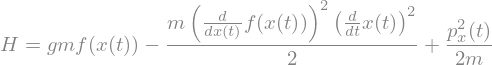

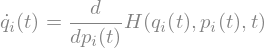

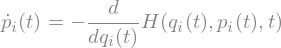

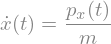

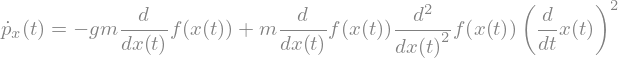

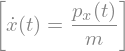

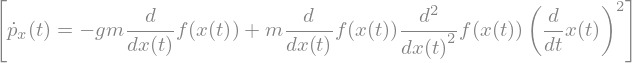

In [3]:
#----> 2.8.2.1 Example 1: Moving Beat on a String
if "2.8.2.1 Example 1: Moving Beat on a String" in sets.flow:
    # todo check
    pprints("2.8.2.1 Example 1: Moving Beat on a String")
    omech.__init__("EulerLagrange")
    omech.verbose = True
    omech.T = Eq(S('T'), S(1)/2*m*(D(x)**2 + D(y)**2))
    omech.T = Eq(S('T'), S(1)/2*m*(xdot**2 + ydot**2))
    omech.V = Eq(S('V'), m*g*y)
    omech.L = Eq(S('L'), omech.T.rhs - omech.V.rhs)
    f = Function('f')(x) 
    omech.L = omech.L.xreplace({y:f, ydot:D(f)})
    [lst_qidot, lst_pidot] = omech.Hamiltons_equations(omech.L, [x], [xdot],
                            [px], [pxdot])
    display(lst_qidot, lst_pidot)

### 2.8.4.1 Example 1: Motion on a Cylinder

'2.8.4.1 Example 1: Motion on a Cylinder'

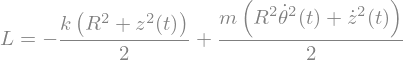

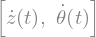

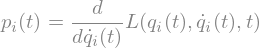

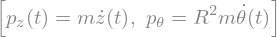

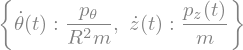

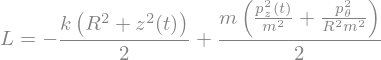

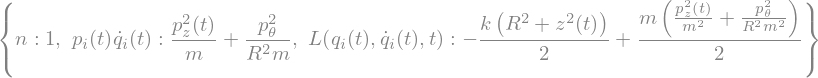

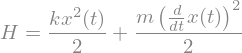

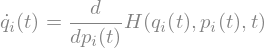

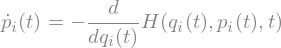

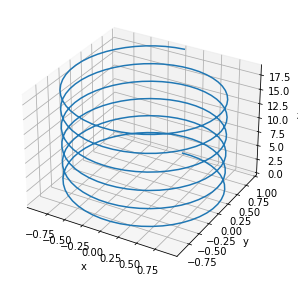

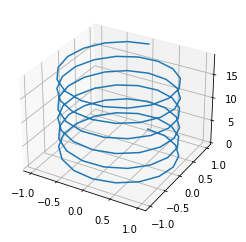

In [4]:
#----> 2.8.4.1 Example 1: Motion on a Cylinder
if "2.8.4.1 Example 1: Motion on a Cylinder" in sets.flow:
    pprints("2.8.4.1 Example 1: Motion on a Cylinder")
    omech.class_type = "EulerLagrange"
    omech.__init__()
    omech.verbose = True
    omech.output_style = {1:"latex", 2:"display"}[2]
    R,kappa = symbols('R kappa', real=True)
    theta = Function('theta')(t)
    thetadot = Function('thetadot')(t)
    p_theta, p_thetadot = symbols('p_theta pdot_theta', real=True)
    
    omech.T = Eq(S('T'), S(1)/2*m*(zdot**2 + R**2*thetadot**2))
    omech.V = Eq(S('V'), k/2*(R**2 + z**2))
    omech.L = Eq(S('L'), omech.T.rhs - omech.V.rhs)
    lst_qi    = [z,theta]
    lst_pi    = [pz, p_theta]
    lst_qidot = [zdot, thetadot]
    lst_pidot = [pzdot, p_thetadot]
    [res_qidot, res_pidot] = omech.Hamiltons_equations(omech.L, [z,theta], 
                            [zdot, thetadot], [pz, p_theta], [pzdot, p_thetadot])
    # pprints(lst_qidot, lst_pidot)
    
    eq1 = Eq(diff(res_qidot[0].lhs,t), diff(res_qidot[0].rhs,t))
    eq1 = eq1.subs({lst_qidot[0]:diff(lst_qi[0]),
                    diff(lst_pi[0]):res_pidot[0].rhs})
    omech.z = dsolve(eq1, lst_qi[0])
    omech.theta = dsolve(Eq(m*R**2*diff(theta), kappa), theta)
    
    
    # Numerical calculations 1. Way, sympy
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:0, C2:1, R:1, m:1, k:0.1, kappa:2}
    z = omech.z.rhs   
    theta = omech.theta.rhs
    x = (R*sin(theta)).xreplace(numvals)
    y = (R*cos(theta)).xreplace(numvals)
    z = z.xreplace(numvals)
    plot3d_parametric_line(x, y, z, (t, 0, 6*pi))
    
    # Numerical calculations 2. Way, matplotlib
    # https://stackoverflow.com/questions/45627187/plot-a-curve-in-3d-with-sympy
    t = symbols('t')
    alpha = [x,y,z]
    f = lambdify(t, alpha)
    # T = [6*math.pi/1000*n for n in range(1000)]
    T = np.linspace(0, 6*np.pi, 100)
    F = [f(t) for t in T]

    fig1, ax1 = plt.subplots(subplot_kw=dict(projection='3d'))
    ax1.plot(*zip(*F))
    ax1.set_aspect('auto')
    plt.show()
    
    # todo: matplotlib animate

In [ ]:
# HW todo:
    # Example 4: Sliding Mass on a Curve p335 (Baumann)
    
    """
    # todo: Future Work,
    2.8.6 Poisson Brackets
    2.8.7 Manifolds and Classes      
    2.8.8 Canonical Transformations
    2.8.9 Generating Functions
    2.8.10 Action Variables
    
    FINAL
    """